In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Initialization

In [2]:
#initialize strategy and position for each agent on grid\
N = 100
p = 0.5
alpha = 4
beta = 1.5

init_position = np.random.random((N, N))
init_strategy = np.random.random((N, N))

S = np.zeros((N, N))
S[init_position >= p] = 1
S[init_position < p] = -1

C = np.zeros((N, N))
C[init_strategy >= p] = 1
C[init_strategy < p] = -1

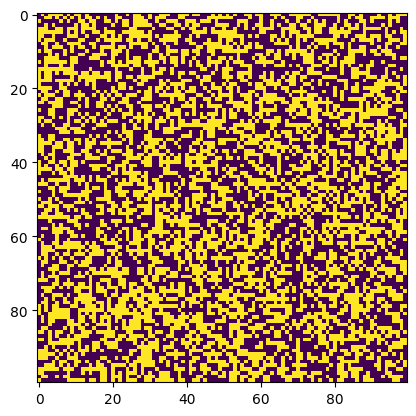

In [3]:
plt.imshow(S)

In [7]:
#Calculate initial energy
M_0 = S.sum()
M_t = M_0

### Main loop: Updating grid

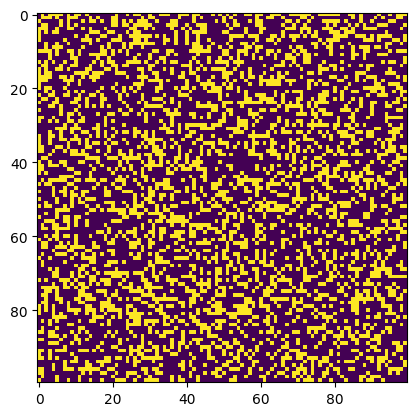

In [29]:

def update(frame):
    global M_t, S, C
    rand_x = random.randint(1, N-1)
    rand_y = random.randint(1, N-1)

    local = S[(rand_x-1)%100][(rand_y-1)%100] \
            + S[(rand_x-1)%100][(rand_y+1)%100] \
            + S[(rand_x+1)%100][(rand_y-1)%100] \
            + S[(rand_x+1)%100][(rand_y+1)%100]
    
    h = local - C[rand_x][rand_y] * alpha * M_t / N
    p = 1/(1 + np.exp(-beta*h))
    
    rand = random.random()

    C[rand_x][rand_y] = -C[rand_x][rand_y] if alpha * C[rand_x][rand_y] * M_t < 0 else C[rand_x][rand_y]

    if rand < p:
        S[rand_x][rand_y] = 1
        M_t += 2
    else:
        S[rand_x][rand_y] = -1
        M_t -= 2
    
    img.set_array(S)
    return img,

fig, ax = plt.subplots()
img = ax.imshow(S, animated=True)

ani = animation.FuncAnimation(fig, update, frames=100, interval=50, blit=True)

plt.show()